In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cisc6000-deep-learning-hw2/sample_submission.csv
/kaggle/input/cisc6000-deep-learning-hw2/M.weights.hdf5
/kaggle/input/cisc6000-deep-learning-hw2/cifar.test.npy
/kaggle/input/cisc6000-deep-learning-hw2/cifar.trainlabel.npy
/kaggle/input/cisc6000-deep-learning-hw2/cifar.train.npy
/kaggle/input/cisc6000-deep-learning-hw2/cifar.testlabel.csv
/kaggle/input/cisc6000-deep-learning-hw2/labels.csv
/kaggle/input/cisc6000-deep-learning-hw2/test_noisy_data/image_18785.png
/kaggle/input/cisc6000-deep-learning-hw2/test_noisy_data/image_16061.png
/kaggle/input/cisc6000-deep-learning-hw2/test_noisy_data/image_02460.png
/kaggle/input/cisc6000-deep-learning-hw2/test_noisy_data/image_04551.png
/kaggle/input/cisc6000-deep-learning-hw2/test_noisy_data/image_01236.png
/kaggle/input/cisc6000-deep-learning-hw2/test_noisy_data/image_04281.png
/kaggle/input/cisc6000-deep-learning-hw2/test_noisy_data/image_19721.png
/kaggle/input/cisc6000-deep-learning-hw2/test_noisy_data/image_14689.png
/kaggle/i

# Convolutional Autoencoder

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
IMAGES_path = "../input/cisc6000-deep-learning-hw2"
def image_folder_to_dataset(path):
    from tensorflow.keras.preprocessing.image import img_to_array, load_img
    images = [f for f in os.listdir(path) if f[-3:]=='png']
    images.sort()
    ds = np.ndarray(shape=(len(images), 64, 64, 1), dtype=np.float32)
    for i, the_image in enumerate(images):
        ds[i] = img_to_array(load_img(os.path.join(path, the_image),color_mode="grayscale"))/255.
    return ds
clean_dataset = image_folder_to_dataset(path = os.path.join(IMAGES_path, "train_clean_data"))
noisy_dataset = image_folder_to_dataset(path = os.path.join(IMAGES_path, "train_noisy_data"))

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(noisy_dataset, clean_dataset, test_size=0.20)

### A. Implement and train your AE using the images in (I) train_clean_data.zip and (II) train_noisy_data.zip. You are free to design your own AE with the following constraints

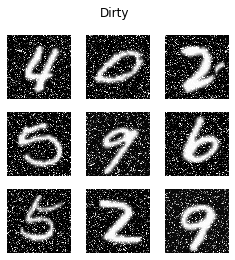

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
for i,images in enumerate(X_train[:9]):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images, cmap="gray")
  plt.title("")
  plt.axis("off")
  plt.suptitle("Dirty")

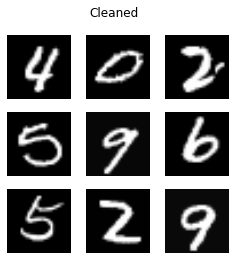

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
for i,images in enumerate(y_train[:9]):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(np.squeeze(images), cmap="gray")
  plt.axis("off")
  plt.suptitle("Cleaned")

In [7]:
latent_layer = 64
class AEDenoiser(tf.keras.models.Model):
    def __init__(self):
        super(AEDenoiser, self).__init__()
        self.enconder = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(64, 64, 1)),
            tf.keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu, padding="same"),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Conv2D(16, kernel_size=3, activation=tf.nn.relu, padding="same"),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Conv2D(latent_layer, kernel_size=3, activation=tf.nn.relu, padding="same", name="LatentLayer")
        ], name='encoder')
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Conv2DTranspose(latent_layer, kernel_size=3, activation=tf.nn.relu, padding="same", name="LatentLayerTransposed"),
            tf.keras.layers.UpSampling2D(),
            tf.keras.layers.Conv2DTranspose(16, kernel_size=3, activation=tf.nn.relu, padding="same"),
            tf.keras.layers.UpSampling2D(),
            tf.keras.layers.Conv2DTranspose(32, kernel_size=3, activation=tf.nn.relu, padding="same"),
            tf.keras.layers.Conv2D(1, kernel_size=3, activation=tf.nn.sigmoid, padding="same")
        ], name="decoder")

    def call(self, x):
        encoded = self.enconder(x)
        decoded = self.decoder(encoded)
        return decoded
ConvAE = AEDenoiser()
ConvAE.compile(optimizer="adam",
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=["mse"])

2022-11-14 04:29:37.175365: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 04:29:37.291248: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 04:29:37.292163: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 04:29:37.294079: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
ConvAE.build(input_shape=(None, 64, 64, 1))

In [9]:
ConvAE.summary()

Model: "ae_denoiser"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Sequential)         (None, 16, 16, 64)        14224     
_________________________________________________________________
decoder (Sequential)         (None, 64, 64, 1)         51089     
Total params: 65,313
Trainable params: 65,313
Non-trainable params: 0
_________________________________________________________________


In [10]:
ConvAE.enconder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
LatentLayer (Conv2D)         (None, 16, 16, 64)        9280      
Total params: 14,224
Trainable params: 14,224
Non-trainable params: 0
_________________________________________________________________


In [11]:
ConvAE.decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LatentLayerTransposed (Conv2 (None, 16, 16, 64)        36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 16)        9232      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 1)         289       
Total params: 51,089
Trainable params: 51,089
Non-trainable params: 0
_______________________________________________________

In [12]:
# Model checkpoint
ModelCheckpoint_path = "Q2a.hdf5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(ModelCheckpoint_path, monitor="val_loss", save_weights_only=True, save_best_only=True)
# Train model
history_ConvAE = ConvAE.fit(x=X_train, y=y_train,
                            epochs=10,
                            validation_data=(X_valid, y_valid), 
                            callbacks=[model_checkpoint], verbose=0)

2022-11-14 04:29:41.573698: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-14 04:29:42.931820: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [13]:
def performance_table(train_perf, val_perf):
    return pd.DataFrame({"Training": train_perf, "Validation": val_perf}, index=["Loss", "Accuracy"])

In [34]:
ConvAE.load_weights(ModelCheckpoint_path) #load best model weights
training_performance = ConvAE.evaluate(X_train, y_train, verbose=0)
validation_performance = ConvAE.evaluate(X_valid, y_valid, verbose=0)
print(performance_table(training_performance, validation_performance))

          Training  Validation
Loss      0.000287    0.000288
Accuracy  0.000287    0.000288


In [15]:
clean_test_dataset = image_folder_to_dataset(path = os.path.join(IMAGES_path, "test_clean_data"))
noisy_test_dataset = image_folder_to_dataset(path = os.path.join(IMAGES_path, "test_noisy_data"))

In [16]:
test_predictions = ConvAE.predict(noisy_test_dataset, verbose=0)
# Test performance
test_performance = ConvAE.evaluate(noisy_test_dataset, clean_test_dataset)

625/625 [==============================] - 2s 3ms/step - loss: 2.8826e-04 - mse: 2.8826e-04


In [17]:
images_to_plot = noisy_test_dataset[:10]
encoded_test_images = ConvAE.enconder(images_to_plot).numpy()
latent_images = tf.reshape(tf.reduce_mean(tf.reduce_mean(encoded_test_images, axis=1), axis=1), shape=(-1, 8, 8))
cleaned_images = ConvAE.predict(images_to_plot, verbose=0)

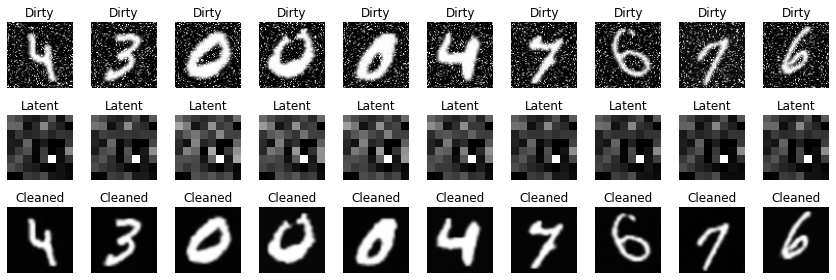

In [18]:
plt.figure(figsize=(12,4))
for i in range(10):
  # Dirty
  plt.subplot(3, 10, i + 1)
  plt.title("Dirty")
  plt.imshow(images_to_plot[i], cmap="gray")
  plt.axis("off")
  # Latent
  plt.subplot(3, 10, 10 + i + 1)
  plt.title("Latent")
  plt.imshow(latent_images[i], cmap="gray")
  plt.axis("off")
  # Cleaned
  plt.subplot(3, 10, 20 + i + 1)
  plt.title("Cleaned")
  plt.imshow(cleaned_images[i], cmap="gray")
  plt.axis("off")
  plt.tight_layout()

### B. To demonstrate the efficacy of an AE model, we have trained a classification model M on clean MNIST images of the same input dimension as those in this exercise. Weights for M are provided in the file (VI) M_weights_hdf5

In [19]:
from sklearn.metrics import multilabel_confusion_matrix
def accuracy_per_class(y_true, y_pred):
    confusion_matrix = multilabel_confusion_matrix(y_true, np.argmax(y_pred,axis=1))
    acc_per_class = {'Class':[], 'Accuracy':[]}
    for i in range(confusion_matrix.shape[0]):
        acc_per_class['Class'].append(i)
        acc_per_class['Accuracy'].append(np.trace(confusion_matrix[i])/np.sum(confusion_matrix[i]))
    return acc_per_class

In [20]:
clean_test_dataset = image_folder_to_dataset(path = os.path.join(IMAGES_path, "test_clean_data"))
noisy_test_dataset = image_folder_to_dataset(path = os.path.join(IMAGES_path, "test_noisy_data"))

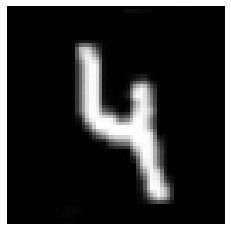

In [21]:
plt.imshow(clean_test_dataset[0], cmap="gray")
plt.axis(False);

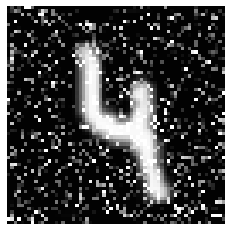

In [22]:
plt.imshow(noisy_test_dataset[0], cmap="gray")
plt.axis(False);

In [23]:
# Load Model
Model_M = tf.keras.models.load_model("../input/cisc6000-deep-learning-hw2/M.weights.hdf5")
Model_M.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=['accuracy'])

In [24]:
# Input shape of loaded model
for layer in Model_M.layers:
    print(layer.input_shape)

(None, 64, 64, 1)
(None, 31, 31, 64)
(None, 31, 31, 64)
(None, 14, 14, 32)
(None, 14, 14, 32)
(None, 14, 14, 32)
(None, 6, 6, 24)
(None, 6, 6, 24)
(None, 6, 6, 24)
(None, 3, 3, 16)
(None, 3, 3, 16)
(None, 3, 3, 16)
(None, 1, 1, 10)


In [25]:
Model_M.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 31, 31, 64)        1088      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        32800     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 24)          12312     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 6, 6, 24)         

In [26]:
labels = pd.read_csv("../input/cisc6000-deep-learning-hw2/labels.csv", index_col=0)

In [27]:
# Predictions
M_on_clean_data_preds = Model_M.predict(clean_test_dataset)
M_on_noisy_data_preds = Model_M.predict(noisy_test_dataset)
# Overall Accuracy 
## Model on clean data
performance_overall_clean = Model_M.evaluate(clean_test_dataset, labels)
## Model on noisy data
performance_overall_noisy = Model_M.evaluate(noisy_test_dataset, labels)

625/625 [==============================] - 1s 2ms/step - loss: 2.9877 - accuracy: 0.6522


In [28]:
# Model M Accuracy per Class - Clean Data
print(pd.DataFrame(accuracy_per_class(labels, M_on_clean_data_preds)))

   Class  Accuracy
0      0   0.99995
1      1   1.00000
2      2   0.99945
3      3   0.99965
4      4   0.99965
5      5   0.99975
6      6   0.99990
7      7   0.99970
8      8   0.99955
9      9   0.99980


In [29]:
# Model M Accuracy per Class - Noisy Data
print(pd.DataFrame(accuracy_per_class(labels, M_on_noisy_data_preds)))

   Class  Accuracy
0      0   0.98740
1      1   0.89955
2      2   0.95450
3      3   0.95890
4      4   0.99030
5      5   0.94910
6      6   0.98045
7      7   0.95450
8      8   0.66535
9      9   0.96445


### AutoEncoder And Model M

In [30]:
AE_and_Model_M = tf.keras.Sequential([ConvAE, 
                                    Model_M], name="AEandModelM")
AE_and_Model_M.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=['accuracy'])

In [31]:
# Predictions
AE_M_on_clean_data_preds = AE_and_Model_M.predict(clean_test_dataset, verbose=0)
AE_M_on_noisy_data_preds = AE_and_Model_M.predict(noisy_test_dataset, verbose=0)
# Overall Accuracy 
AE_M_acc_overall_clean = AE_and_Model_M.evaluate(clean_test_dataset, labels)
AE_M_acc_overall_noisy = AE_and_Model_M.evaluate(noisy_test_dataset, labels)

625/625 [==============================] - 2s 4ms/step - loss: 0.0074 - accuracy: 0.9984


In [32]:
# Autoencoder+Model M Accuracy per Class - Clean Data
print(pd.DataFrame(accuracy_per_class(labels, AE_M_on_clean_data_preds)))

   Class  Accuracy
0      0   0.99995
1      1   0.99995
2      2   0.99945
3      3   0.99960
4      4   0.99960
5      5   0.99970
6      6   0.99990
7      7   0.99970
8      8   0.99950
9      9   0.99975


In [33]:
# Autoencoder+Model M Accuracy per Class - Noisy Data
print(pd.DataFrame(accuracy_per_class(labels, AE_M_on_noisy_data_preds)))

   Class  Accuracy
0      0   0.99995
1      1   0.99995
2      2   0.99940
3      3   0.99960
4      4   0.99955
5      5   0.99970
6      6   0.99990
7      7   0.99955
8      8   0.99950
9      9   0.99970
